# FRAUD DETECTION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
import sys
sys.path.append('../')

data_name = ['creditcard','Fraud_Data','IpAddress_to_Country']
data = {}
for name in data_name:
    data[name] = pd.read_csv(f'../docs/{name}.csv')


In [4]:
data[data_name[1]].head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [21]:
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200000
pd.options.display.max_rows = 400000

In [6]:
from scripts.analysis import *
info(data[data_name[1]])

Summary Statistics:
              user_id  purchase_value            age    ip_address          class
count  151112.000000   151112.000000  151112.000000  1.511120e+05  151112.000000
mean   200171.040970       36.935372      33.140704  2.152145e+09       0.093646
std    115369.285024       18.322762       8.617733  1.248497e+09       0.291336
min         2.000000        9.000000      18.000000  5.209350e+04       0.000000
25%    100642.500000       22.000000      27.000000  1.085934e+09       0.000000
50%    199958.000000       35.000000      33.000000  2.154770e+09       0.000000
75%    300054.000000       49.000000      39.000000  3.243258e+09       0.000000
max    400000.000000      154.000000      76.000000  4.294850e+09       1.000000
Variance:
 user_id           1.331007e+10
purchase_value    3.357236e+02
age               7.426533e+01
ip_address        1.558745e+18
class             8.487680e-02
dtype: float64
Standard Deviation:
 user_id           1.153693e+05
purchase_value   

In [7]:
check_missing(data[data_name[0]])


Missing Values:
 Series([], dtype: int64)


In [8]:
data[data_name[1]].columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [9]:
for name in data_name:
    data[name] = data[name].drop_duplicates()

data[data_name[1]]['signup_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])
data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])

data[data_name[0]]['Time'] = pd.to_datetime(data[data_name[0]]['Time'])

data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])
data[data_name[1]]['purchase_time'] = pd.to_datetime(data[data_name[1]]['signup_time'])


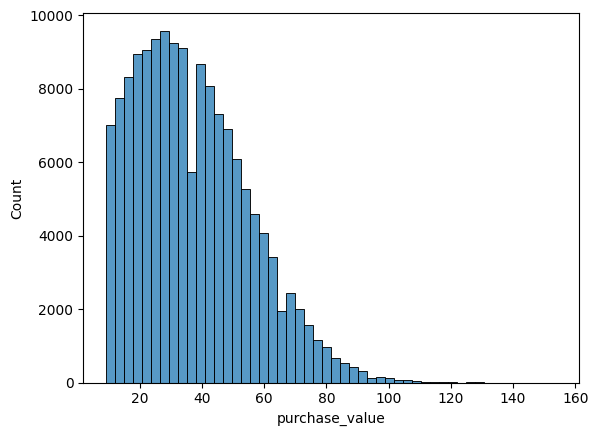

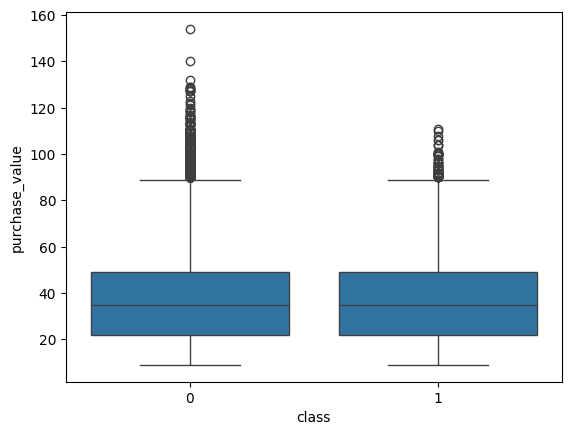

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis
sns.histplot(data[data_name[1]]['purchase_value'], bins=50)
plt.show()

# Bivariate analysis
sns.boxplot(x='class', y='purchase_value', data=data[data_name[1]])
plt.show()


In [11]:
data[data_name[2]]['upper_bound_ip_address'].head()

0    16777471
1    16777727
2    16778239
3    16779263
4    16781311
Name: upper_bound_ip_address, dtype: int64

In [12]:
import ipaddress

def convert_ip_to_int(ip):
    if isinstance(ip, (int, float)):  # Check if the value is already an int or float
        return int(ip)  # Convert float to int if needed
    try:
        return int(ipaddress.IPv4Address(ip))
    except ( ValueError):
        return None  # or -1 or any placeholder for invalid IPs

# Convert IP addresses to integer format with error handling
data[data_name[1]]['ip_address'] = data[data_name[1]]['ip_address'].apply(convert_ip_to_int)
data[data_name[2]]['lower_bound_ip_address'] = data[data_name[2]]['lower_bound_ip_address'].apply(convert_ip_to_int)
data[data_name[2]]['upper_bound_ip_address'] = data[data_name[2]]['upper_bound_ip_address'].apply(convert_ip_to_int)


In [13]:
data[data_name[1]].head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-02-24 22:55:49,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-07 20:39:50,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:44,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-04-28 21:13:25,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-07-21 07:09:52,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0


In [ ]:
merged_results = []

for _, bounds_row in data[data_name[2]].iterrows():
    lower_bound = bounds_row['lower_bound_ip_address']
    upper_bound = bounds_row['upper_bound_ip_address']
    
    filtered_ips = data[data_name[1]][
        (data[data_name[1]]['ip_address'] >= lower_bound) & 
        (data[data_name[1]]['ip_address'] <= upper_bound)
    ]
    
    merged_results.append(filtered_ips)

merged = pd.concat(merged_results, ignore_index=True)

merged.drop_duplicates(inplace=True)


In [68]:
merged.to_csv('Merged_Fraud_Data.csv', index=False)

,ip_address,lower_bound_ip_address,upper_bound_ip_address,country


In [16]:
merged_data = pd.read_csv('../docs/Merged_Fraud_Data.csv')
merged_data.count()

user_id                   129146
signup_time               129146
purchase_time             129146
purchase_value            129146
device_id                 129146
source                    129146
browser                   129146
sex                       129146
age                       129146
ip_address                129146
class                     129146
lower_bound_ip_address    129146
upper_bound_ip_address    129146
country                   129146
dtype: int64

In [3]:
merged_data = pd.read_csv('../docs/Merged_Fraud_Data.csv')

merged_data['signup_time'] = pd.to_datetime(merged_data['signup_time'])
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

merged_data['transaction_count'] = merged_data.groupby('device_id')['purchase_time'].transform('count')

merged_data = merged_data.sort_values(['device_id', 'purchase_time']) 
merged_data['time_since_last_purchase'] = merged_data.groupby('device_id')['purchase_time'].diff().dt.total_seconds()

merged_data['time_since_last_purchase'] = merged_data['time_since_last_purchase'].fillna(0)

print(merged_data[['device_id', 'purchase_time', 'transaction_count', 'time_since_last_purchase']].head())


           device_id       purchase_time  transaction_count  \
29358  AAALBGNHHVMKG 2015-06-13 23:42:18                  1   
49251  AAAWIHVCQELTP 2015-03-29 00:39:07                  1   
59069  AAAXXOZJRZRAO 2015-01-01 04:25:23                 11   
30654  AAAXXOZJRZRAO 2015-01-01 04:25:24                 11   
98558  AAAXXOZJRZRAO 2015-01-01 04:25:25                 11   

       time_since_last_purchase  
29358                       0.0  
49251                       0.0  
59069                       0.0  
30654                       1.0  
98558                       1.0  


In [5]:
merged_data['device_id'].nunique()

118434

In [6]:
merged_data[merged_data['transaction_count']>1].count()

user_id                     15334
signup_time                 15334
purchase_time               15334
purchase_value              15334
device_id                   15334
source                      15334
browser                     15334
sex                         15334
age                         15334
ip_address                  15334
class                       15334
lower_bound_ip_address      15334
upper_bound_ip_address      15334
country                     15334
transaction_count           15334
time_since_last_purchase    15334
dtype: int64

In [7]:
merged = merged_data.sort_values(by=['device_id', 'purchase_time'])

merged['transaction_frequency'] = merged.groupby('user_id')['purchase_time'].transform('count')

merged['prev_purchase_time'] = merged.groupby('user_id')['purchase_time'].shift(1)
merged['transaction_velocity'] = (merged['purchase_time'] - merged['prev_purchase_time']).dt.total_seconds().fillna(0)


In [8]:
merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,time_since_last_purchase,transaction_frequency,prev_purchase_time,transaction_velocity
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,0,2494562304,2494627839,United Kingdom,1,0.0,1,NaT,0.0
49251,103319,2015-02-05 22:20:04,2015-03-29 00:39:07,94,AAAWIHVCQELTP,Ads,Chrome,M,29,809263681,0,805306368,822083583,United States,1,0.0,1,NaT,0.0
59069,325729,2015-01-01 04:25:22,2015-01-01 04:25:23,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,1,1377828864,1378877439,United Kingdom,11,0.0,1,NaT,0.0
30654,64674,2015-01-01 04:25:23,2015-01-01 04:25:24,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,1,1377828864,1378877439,United Kingdom,11,1.0,1,NaT,0.0
98558,336015,2015-01-01 04:25:24,2015-01-01 04:25:25,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,1,1377828864,1378877439,United Kingdom,11,1.0,1,NaT,0.0


In [9]:
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour

# Extract the day of the week (0=Monday, 6=Sunday) from the purchase_time
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

print(merged_data[['purchase_time', 'hour_of_day', 'day_of_week']].head())


            purchase_time  hour_of_day  day_of_week
29358 2015-06-13 23:42:18           23            5
49251 2015-03-29 00:39:07            0            6
59069 2015-01-01 04:25:23            4            3
30654 2015-01-01 04:25:24            4            3
98558 2015-01-01 04:25:25            4            3


In [10]:
merged_data['time_diff'] = (merged_data['purchase_time'] - merged_data['signup_time']).dt.total_seconds()

merged_data['transaction_count'] = merged_data.groupby('user_id')['purchase_value'].transform('count')
merged_data['velocity'] = merged_data['purchase_value'] / merged_data['time_diff']


In [11]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,time_since_last_purchase,hour_of_day,day_of_week,time_diff,velocity
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,0,2494562304,2494627839,United Kingdom,1,0.0,23,5,2792507.0,0.000016
49251,103319,2015-02-05 22:20:04,2015-03-29 00:39:07,94,AAAWIHVCQELTP,Ads,Chrome,M,29,809263681,0,805306368,822083583,United States,1,0.0,0,6,4414743.0,0.000021
59069,325729,2015-01-01 04:25:22,2015-01-01 04:25:23,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,1,1377828864,1378877439,United Kingdom,1,0.0,4,3,1.0,57.000000
30654,64674,2015-01-01 04:25:23,2015-01-01 04:25:24,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,1,1377828864,1378877439,United Kingdom,1,1.0,4,3,1.0,57.000000
98558,336015,2015-01-01 04:25:24,2015-01-01 04:25:25,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,1,1377828864,1378877439,United Kingdom,1,1.0,4,3,1.0,57.000000


In [12]:
merged_data['day_of_week'].unique()

array([5, 6, 3, 2, 0, 1, 4], dtype=int32)

>> ## Handle Cyclical data

In [13]:
import numpy as np
import pandas as pd

# Cyclical encoding hour
merged_data['hour_sin'] = np.sin(2 * np.pi * merged_data['hour_of_day'] / 23)
merged_data['hour_cos'] = np.cos(2 * np.pi * merged_data['hour_of_day'] / 23)

# Cyclical encoding day
merged_data['day_sin'] = np.sin(2 * np.pi * merged_data['day_of_week'] / 6)
merged_data['day_cos'] = np.cos(2 * np.pi * merged_data['day_of_week'] / 6)



merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,transaction_count,time_since_last_purchase,hour_of_day,day_of_week,time_diff,velocity,hour_sin,hour_cos,day_sin,day_cos
29358,226648,2015-05-12 16:00:31,2015-06-13 23:42:18,45,AAALBGNHHVMKG,Direct,Chrome,M,34,2494581089,...,1,0.0,23,5,2792507.0,0.000016,-2.449294e-16,1.000000,-8.660254e-01,0.5
49251,103319,2015-02-05 22:20:04,2015-03-29 00:39:07,94,AAAWIHVCQELTP,Ads,Chrome,M,29,809263681,...,1,0.0,0,6,4414743.0,0.000021,0.000000e+00,1.000000,-2.449294e-16,1.0
59069,325729,2015-01-01 04:25:22,2015-01-01 04:25:23,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,...,1,0.0,4,3,1.0,57.000000,8.878852e-01,0.460065,1.224647e-16,-1.0
30654,64674,2015-01-01 04:25:23,2015-01-01 04:25:24,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,...,1,1.0,4,3,1.0,57.000000,8.878852e-01,0.460065,1.224647e-16,-1.0
98558,336015,2015-01-01 04:25:24,2015-01-01 04:25:25,57,AAAXXOZJRZRAO,Ads,FireFox,F,36,1377849233,...,1,1.0,4,3,1.0,57.000000,8.878852e-01,0.460065,1.224647e-16,-1.0


In [17]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['purchase_value', 'velocity','transaction_count','age','time_diff',
                     'time_since_last_purchase','hour_sin','hour_cos','day_sin','day_cos']
scaler = StandardScaler()
merged_data[columns_to_scale] = scaler.fit_transform(merged_data[columns_to_scale])


In [28]:
merged_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'transaction_count', 'time_since_last_purchase', 'hour_of_day',
       'day_of_week', 'time_diff', 'velocity', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos'],
      dtype='object')

In [37]:
for col in merged_data.columns:
    print(f'{col}: has {merged_data[col].nunique()} unique values\n')

user_id: has 129146 unique values

signup_time: has 129146 unique values

purchase_time: has 128830 unique values

purchase_value: has 122 unique values

device_id: has 118434 unique values

source: has 3 unique values

browser: has 5 unique values

sex: has 2 unique values

age: has 56 unique values

ip_address: has 122498 unique values

class: has 2 unique values

lower_bound_ip_address: has 25804 unique values

upper_bound_ip_address: has 25804 unique values

country: has 181 unique values

transaction_count: has 1 unique values

time_since_last_purchase: has 4727 unique values

hour_of_day: has 24 unique values

day_of_week: has 7 unique values

time_diff: has 122500 unique values

velocity: has 122530 unique values

hour_sin: has 24 unique values

hour_cos: has 21 unique values

day_sin: has 7 unique values

day_cos: has 5 unique values



In [40]:
from sklearn.preprocessing import  LabelEncoder

# Step 1: Handle categorical features with One-Hot Encoding
categorical_features = ['source', 'browser']
merged_data = pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)


# Step 2: Handle categorical features feature with Label Encoding
label_encoding_columns = ['user_id','sex','device_id', 'ip_address', 'country']
label_encoder = LabelEncoder()
for column in label_encoding_columns:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])


merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,lower_bound_ip_address,...,hour_sin,hour_cos,day_sin,day_cos,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari
29358,73195,2015-05-12 16:00:31,2015-06-13 23:42:18,0.440423,0,1,0.101168,81222,0,2494562304,...,0.001739,1.334396,-1.321617,0.473874,True,False,False,False,False,False
49251,33190,2015-02-05 22:20:04,2015-03-29 00:39:07,3.115427,1,1,-0.479197,26191,0,805306368,...,0.001739,1.334396,0.005828,1.146531,False,False,False,False,False,False
59069,105202,2015-01-01 04:25:22,2015-01-01 04:25:23,1.095526,2,0,0.333314,44730,1,1377828864,...,1.283447,0.584623,0.005828,-1.544095,False,False,True,False,False,False
30654,20682,2015-01-01 04:25:23,2015-01-01 04:25:24,1.095526,2,0,0.333314,44730,1,1377828864,...,1.283447,0.584623,0.005828,-1.544095,False,False,True,False,False,False
98558,108483,2015-01-01 04:25:24,2015-01-01 04:25:25,1.095526,2,0,0.333314,44730,1,1377828864,...,1.283447,0.584623,0.005828,-1.544095,False,False,True,False,False,False


In [42]:
merged_data.to_csv('../docs/encoded_data.csv')

In [ ]:
encoded_data = pd.read_csv('../docs/encoded_data.csv')